# Notebook Imports and Packages 


In [1]:
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

# Example 1 - A Simple Cost Function
### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
# Make Data
x_1 =np.linspace(start=-3,stop=3,num=100)

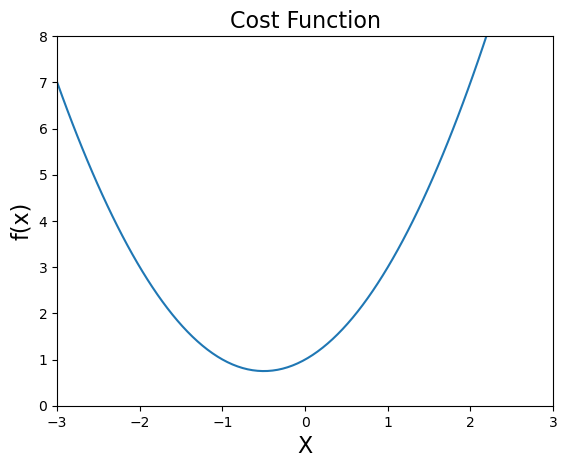

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('f(x)',fontsize='16')
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivative

In [5]:
def df(x):
    return 2*x+1

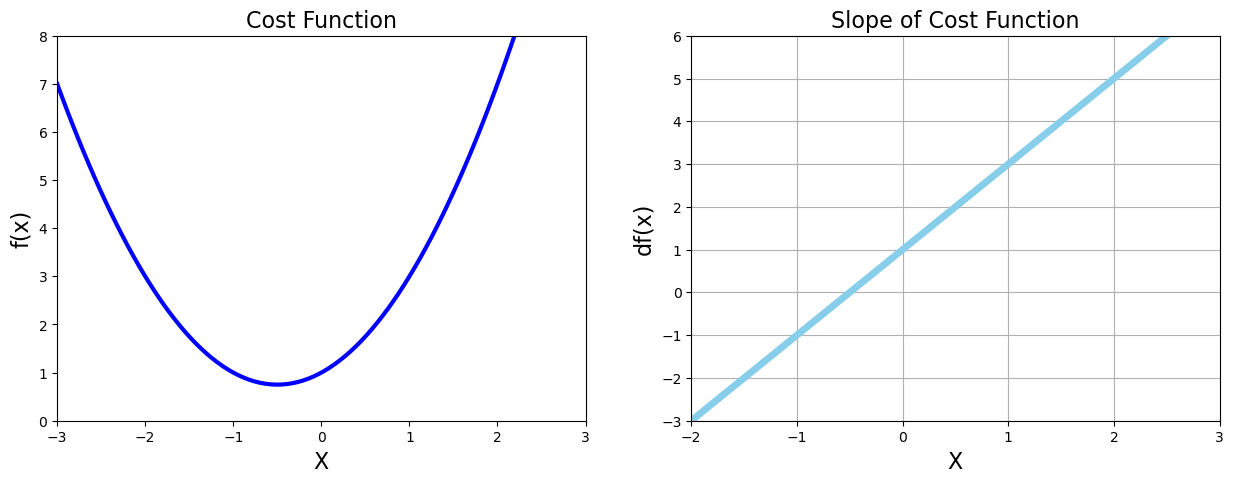

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('f(x)',fontsize='16')
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

#2 Chart:Derivative
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('df(x)',fontsize='16')
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)

plt.show()

# Gradient Descent Function

In [7]:
# Gradient Descent

new_x=3
prev_x =0
step_multiplier=0.1
precision=0.0001

x_list=[new_x]
slope_list=[df(new_x)]

for n in range(500):
    prev_x=new_x
    gradient=df(prev_x)
    new_x=prev_x - step_multiplier* gradient

    x_list.append(new_x)
    slope_list.append(df(new_x))

    
    step_size=abs(new_x-prev_x)
    # print(step_size)
    if step_size < precision:
        break

print('Local Minima occurs at:',new_x)
print('Slope value at this point is :',df(new_x))
print('Cost at this point is :',f(new_x))


Local Minima occurs at: -0.49962781616118024
Slope value at this point is : 0.0007443676776395236
Cost at this point is : 0.7500001385208099


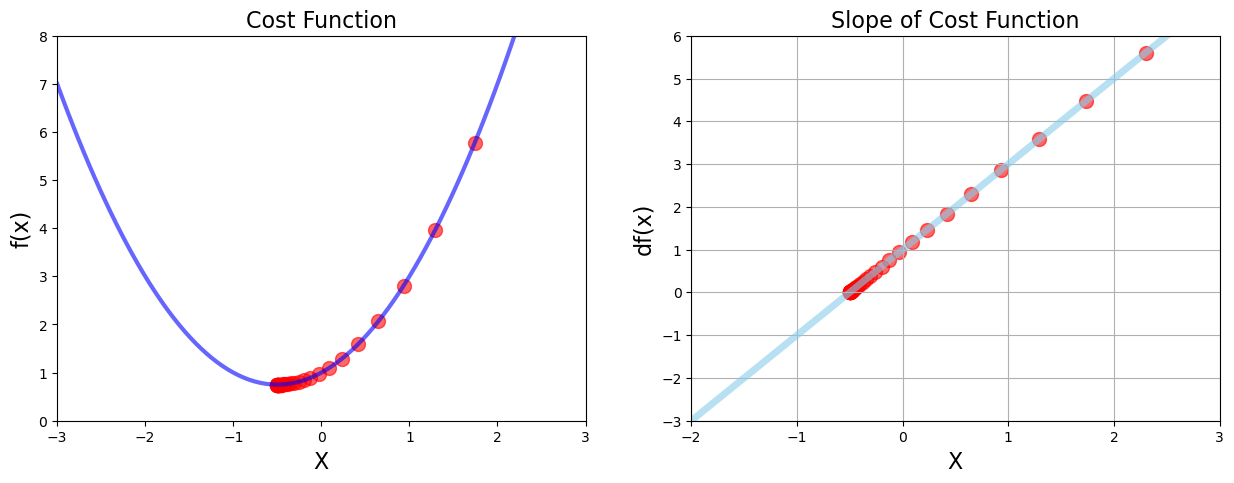

In [8]:
# SuperImpose the Gradient Descent calculation on Plot 

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('f(x)',fontsize='16')
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.6)

values =np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.6)


#2 Chart:Derivative
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('df(x)',fontsize='16')
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5,alpha=0.6)

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.6)

plt.show()

# Example 2 - Multiple Minima & Initial Guess

## $$g(x)=x^4 - 4*x^2 + 5$$

In [10]:
#make some data
x_2 = np.linspace(-2,2,100)

def g(x):
    return x**4-4*x**2 +5

def dg(x):
    return 4*x**3 - 8*x

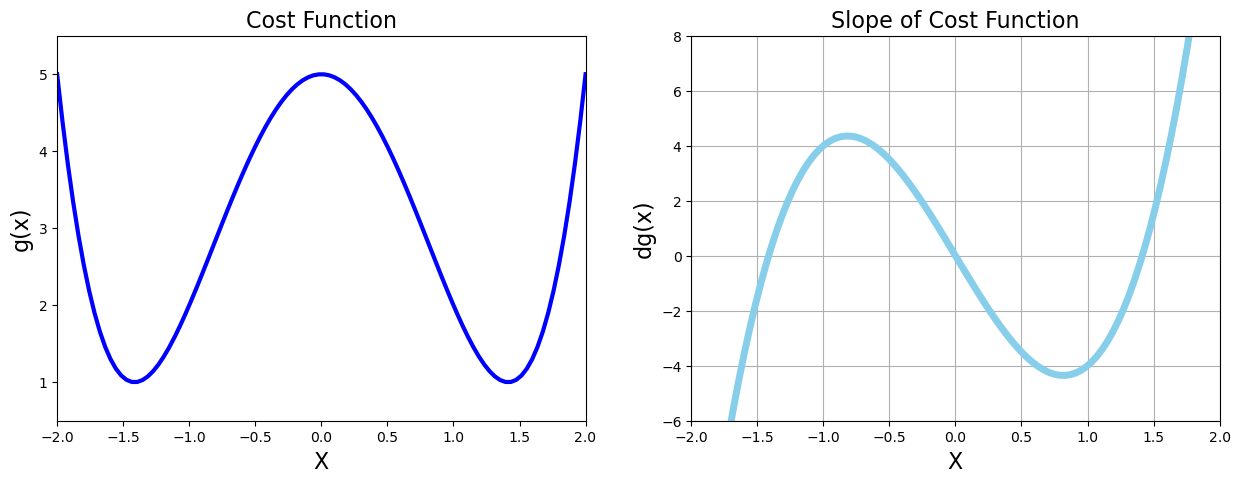

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('g(x)',fontsize='16')
plt.plot(x_2,g(x_2),color='blue',linewidth=3)

#2 Chart:Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('dg(x)',fontsize='16')
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)

plt.show()

## Gradient Descent as a Python function

In [19]:
def gradientDescent (derivative_func,initial_guess,multiplier,precision):
    new_x=initial_guess    
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]
    
    for n in range(500):
        prev_x=new_x
        gradient=derivative_func(prev_x)
        new_x=prev_x - multiplier* gradient
        
        step_size=abs(new_x-prev_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
    return new_x,x_list,slope_list

In [25]:
local_min , list_x,deriv_list=gradientDescent(dg,0.5,0.02,0.001)
print('Local Minima occurs at:',local_min)
print('Number of steps :',len(list_x))

# print('Slope value at this point is :',df(new_x))
# print('Cost at this point is :',f(new_x))

Local Minima occurs at: 1.4122375085019094
Number of steps : 23


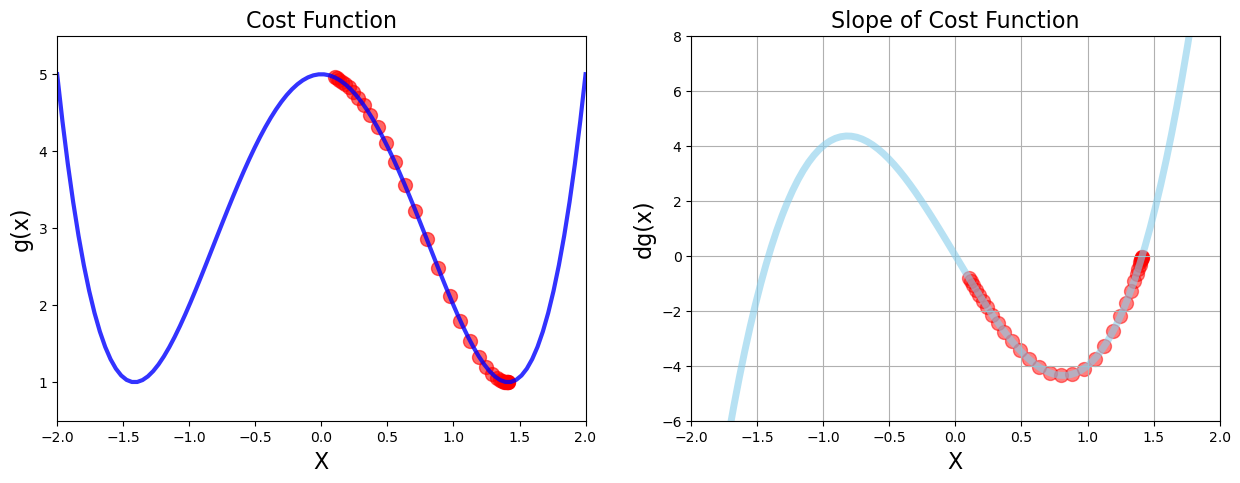

In [28]:
# Calling Gradient Descent Function
local_min , list_x,deriv_list=gradientDescent(dg,0.1,0.02,0.001)
# Plot function and derivative and Scatter Plot side by side

plt.figure(figsize=[15,5])

#1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('g(x)',fontsize='16')
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#2 Chart:Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of Cost Function',fontsize='16' )
plt.xlabel('X',fontsize='16')
plt.ylabel('dg(x)',fontsize='16')
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)

plt.show()